In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt

## Directory for where the jj.py file is located
sys.path.append('/home/pi/Documents/Git/Josephson_Junction_Neuromorphic-Raspi4-/')

import jj

### Single Neuron

Now that I have shown in the 'Single Junction.ipynb' that Newton's method of approximation is sufficient for simulating the Josephson Junction, I can couple them as described in Josephson junction simulation of neurons (reference 2 in wiki)

$\ddot{\phi_p}+\alpha\dot{\phi_p}+sin{(\phi_p)}=i_p=-\lambda(\phi_c + \phi_p)+\Lambda_s i_{in}+(1-\Lambda_p)i_b$
$\eta[\ddot{\phi_c}+\alpha\dot{\phi_c}+sin{(\phi_c)}]=i_c=-\lambda(\phi_c + \phi_p)+\Lambda_s i_{in}-\Lambda_p i_b$

$\lambda = 0.1, \alpha = 1.5, \Lambda_s = \Lambda_b = 0.5, \eta = 1, i_{in} = 0.21$


In [6]:
## Time domain set up
t0 = 0 # Initial Time
tf = 300 # Final Time (Change this if you import tensorflow as tf)
n = 20000 # Resolution
ts = (tf - t0) / n # A single time step length
tspan = np.arange(t0, tf + ts, ts)  # time span

phi_c = np.zeros_like(tspan)
v_c = np.zeros_like(tspan)

phi_p = np.zeros_like(tspan)
v_p = np.zeros_like(tspan)

## System Parameters
lmda = 0.1
gamma = 1.5
lmda_s = 0.5
lmda_p = 0.5
eta = 1
i_in = 0.21
i_b = 1.9


## Initial Conditions
phi_p[0] = 0
v_p[0] = 0
phi_c[0] = 0
v_c[0] = 0
i_p = -lmda*(phi_c[0] + phi_p[0]) + lmda_s*i_in + (1-lmda_p)*i_b
i_c = (-lmda*(phi_c[0] + phi_p[0]) + lmda_s*i_in - lmda_p*i_b)/eta


## Performing the iterations
for j in range(np.size(tspan)-1):
    phi_p[j+1], v_p[j+1] = jj.junction_step(phi_p[j], v_p[j], ts, gamma, i_p)
    phi_c[j+1], v_c[j+1] = jj.junction_step(phi_c[j], v_c[j], ts, gamma, i_c)
    i_p = -lmda*(phi_c[j+1] + phi_p[j+1]) + lmda_s*i_in + (1-lmda_p)*i_b
    i_c = (-lmda*(phi_c[j+1] + phi_p[j+1]) + lmda_s*i_in - lmda_p*i_b)/eta   

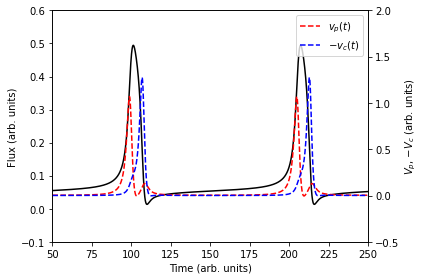

In [10]:
## Plotting
fig, ax1 = plt.subplots()

color = 'black'
fig.patch.set_facecolor('white')
ax1.set_xlabel('Time (arb. units)')
ax1.set_ylabel('Flux (arb. units)')
ax1.plot(tspan,lmda*(phi_p+phi_c), color=color)
ax1.set_xlim(50,250)
ax1.set_ylim(-0.1,0.6)

ax2 = ax1.twinx()

ax2.set_ylabel(r'$V_p$, $-V_c$ (arb. units)')
ax2.plot(tspan,v_p,'r--')
ax2.plot(tspan,-1*v_c,'b--')
ax2.legend([r'$v_p(t)$',r'$-v_c(t)$'])
ax2.set_ylim(-0.5,2)

fig.tight_layout()
plt.show()

This figure is almost identical to the one in the Josephson junction simulation of neurons paper(wiki reference 2). Here it shows the periodic behaviour of the simulated neuron, and has the profile of an action potential. This is how neurons fire, and shows that we can use these coupled junctions with the correct parameters to creat a neural network.

Now I double check the function that only does a single time step

In [9]:
%timeit jj.junction_step(phi_p[j], v_p[j], ts, gamma, i_p)

13.1 µs ± 29.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The code is taking roughly 13 microseconds, which if you loop 20000 times, which is what my code does, then you get back 0.26 seconds, which matches the method of the first function used in 'Single Junction.ipynb'. The only difference in these methods is the first one will calculate all the time steps, where this one performs a single step to allow for a more intuitive coupling of the junctions.